# Import the necessary libraries

In [22]:
import sqlite3
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly
import plotly.express as px

# Connect to the database

In [23]:
conn = sqlite3.connect('clean_database.db')
cursor = conn.cursor()

# Check all the tables available within the database

In [24]:
cursor.execute("SELECT name FROM sqlite_master WHERE type ='table';")
print(cursor.fetchall())

[('Meteostat_Data',), ('Entsoe_Data',), ('Entsoe_Meteostat_Data',), ('Entsoe_real_data',), ('Entsoe_real_values_and_Meteostat_data',), ('Entsoe_forecasted_data',), ('Entsoe_forecasted_data_and_Meteostat_data',), ('Feature_selected_real_data',), ('Feature_selected_forecasted_data',), ('RandomForest_Train_Real_Test_Forecast',), ('LinearRegresion_Train_Real_Test_Forecast',), ('LinearRegresion_Train_Forecast_Test_Forecast',), ('LinearRegresion_Train_Real_Test_Real',), ('RandomForest_Train_Forecast_Test_Forecast',), ('RandomForest_Train_Real_Test_Real',), ('Prophet_Train_Real_Test_Forecast',), ('Prophet_Train_Forecast_Test_Forecast',), ('Optimized_Prophet_Train_Forecast_Test_Forecast',), ('Prophet_Train_Real_Test_Real',), ('Optimized_Prophet_Train_Real_Test_Forecast',), ('y_train',), ('y_test',), ('X_train_real',), ('X_test_real',), ('X_train_forecasted',), ('X_test_forecasted',), ('Optimized_Prophet_Train_Real_Test_Real',)]


# Retrieving the necesary tables from database

In [25]:
linear_regression = pd.read_sql("SELECT * FROM LinearRegresion_Train_Real_Test_Real;", conn)
linear_regression["timestamp"] = pd.to_datetime(linear_regression["timestamp"])
linear_regression = linear_regression.set_index("timestamp")

In [26]:
random_forest = pd.read_sql("SELECT * FROM RandomForest_Train_Real_Test_Real;", conn)
random_forest["timestamp"] = pd.to_datetime(random_forest["timestamp"])
random_forest = random_forest.set_index("timestamp")

In [27]:
prophet = pd.read_sql("SELECT * FROM Prophet_Train_Real_Test_Real;", conn)
prophet["timestamp"] = pd.to_datetime(prophet["timestamp"])
prophet = prophet.set_index("timestamp")

In [28]:
optimized_prophet = pd.read_sql("SELECT * FROM Optimized_Prophet_Train_Real_Test_Real;", conn)
optimized_prophet["timestamp"] = pd.to_datetime(optimized_prophet["timestamp"])
optimized_prophet = optimized_prophet.set_index("timestamp")

# Data Visualization

### LinearRegression

In [29]:
fig_1 = go.Figure()

fig_1.add_trace(go.Scatter(x = linear_regression.index, y = linear_regression["real_energy_load"], name ='Actual'))
fig_1.add_trace(go.Scatter(x = linear_regression.index, y = linear_regression["yp_test_LinearRegression"], name='Predicted'))

In [30]:
linear_regression

yp_test_LinearRegression  real_energy_load
timestamp                                                      
2021-08-03 01:00:00               6124.997180           6115.00
2021-08-03 02:00:00               5967.729052           5937.50
2021-08-03 03:00:00               5873.319222           5820.50
2021-08-03 04:00:00               5866.066357           5827.00
2021-08-03 05:00:00               5936.148619           5913.50
...                                       ...               ...
2021-12-31 19:00:00               7754.070785           7577.25
2021-12-31 20:00:00               7475.870548           7227.25
2021-12-31 21:00:00               7112.563338           6839.25
2021-12-31 22:00:00               6747.809870           6554.00
2021-12-31 23:00:00               6504.101015           6354.00

[3623 rows x 2 columns]

array([[<AxesSubplot:title={'center':'yp_test_LinearRegression'}>,
        <AxesSubplot:title={'center':'real_energy_load'}>]], dtype=object)

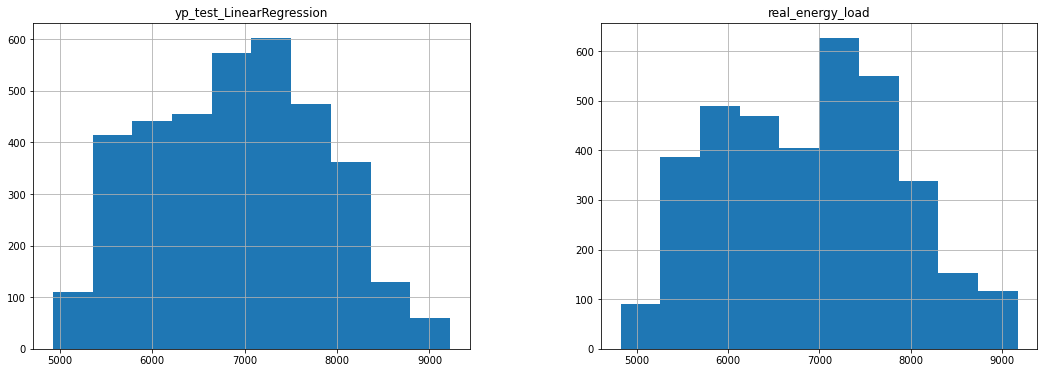

In [31]:
linear_regression.hist(figsize = (18, 6))

In [32]:
df = linear_regression
fig = px.scatter(df, x=linear_regression.index, y= "real_energy_load", hover_data =['yp_test_LinearRegression'], color='yp_test_LinearRegression')
fig.show()

### RandomForest

In [33]:
fig_1 = go.Figure()

fig_1.add_trace(go.Scatter(x = random_forest.index, y = random_forest["real_energy_load"], name ='Actual'))
fig_1.add_trace(go.Scatter(x = random_forest.index, y = random_forest["yp_test_RandomForest"], name='Predicted'))

array([[<AxesSubplot:title={'center':'yp_test_RandomForest'}>,
        <AxesSubplot:title={'center':'real_energy_load'}>]], dtype=object)

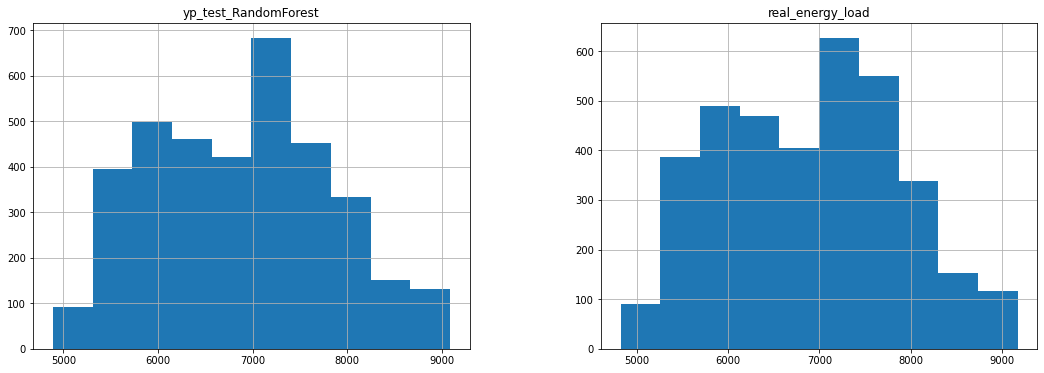

In [34]:
random_forest.hist(figsize = (18, 6))

In [35]:
df = random_forest
fig = px.scatter(df, x=random_forest.index, y= "real_energy_load", hover_data =['yp_test_RandomForest'], color='yp_test_RandomForest')
fig.show()

### Prophet

In [36]:
fig_1 = go.Figure()

fig_1.add_trace(go.Scatter(x = prophet.index, y = prophet["real_energy_load"], name ='Actual'))
fig_1.add_trace(go.Scatter(x = prophet.index, y = prophet["yp_test_Prophet"], name='Predicted'))

array([[<AxesSubplot:title={'center':'yp_test_Prophet'}>,
        <AxesSubplot:title={'center':'real_energy_load'}>]], dtype=object)

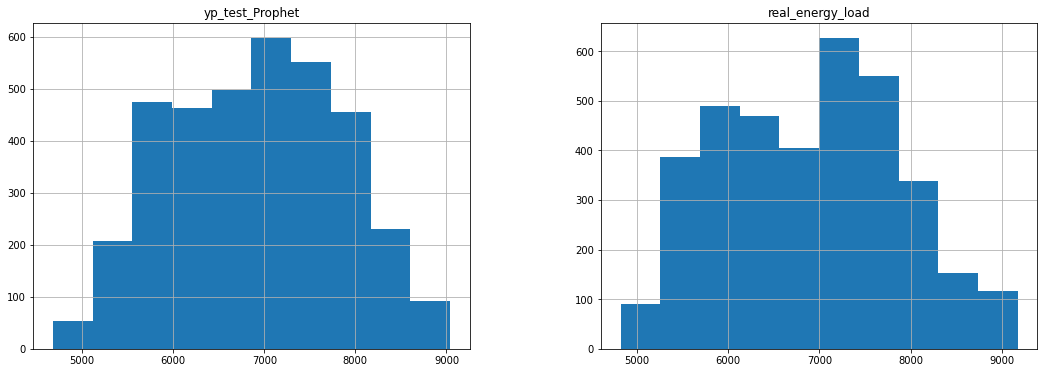

In [37]:
prophet.hist(figsize = (18, 6))

In [38]:
df = prophet
fig = px.scatter(df, x=prophet.index, y= "real_energy_load", hover_data =['yp_test_Prophet'], color='yp_test_Prophet')
fig.show()

### Optimazed Prophet

In [39]:
optimized_prophet

yp_test_Prophet_Optimized  real_energy_load
timestamp                                                       
2021-08-03 01:00:00                6082.209276           6115.00
2021-08-03 02:00:00                5883.945138           5937.50
2021-08-03 03:00:00                5756.727802           5820.50
2021-08-03 04:00:00                5729.535687           5827.00
2021-08-03 05:00:00                5793.378943           5913.50
...                                        ...               ...
2021-12-31 19:00:00                7789.624508           7577.25
2021-12-31 20:00:00                7524.359224           7227.25
2021-12-31 21:00:00                7131.698730           6839.25
2021-12-31 22:00:00                6693.001699           6554.00
2021-12-31 23:00:00                6341.753286           6354.00

[3623 rows x 2 columns]

In [40]:
fig_1 = go.Figure()

fig_1.add_trace(go.Scatter(x = optimized_prophet.index, y = optimized_prophet["real_energy_load"], name ='Actual'))
fig_1.add_trace(go.Scatter(x = optimized_prophet.index, y = optimized_prophet["yp_test_Prophet_Optimized"], name='Predicted'))

array([[<AxesSubplot:title={'center':'yp_test_Prophet_Optimized'}>,
        <AxesSubplot:title={'center':'real_energy_load'}>]], dtype=object)

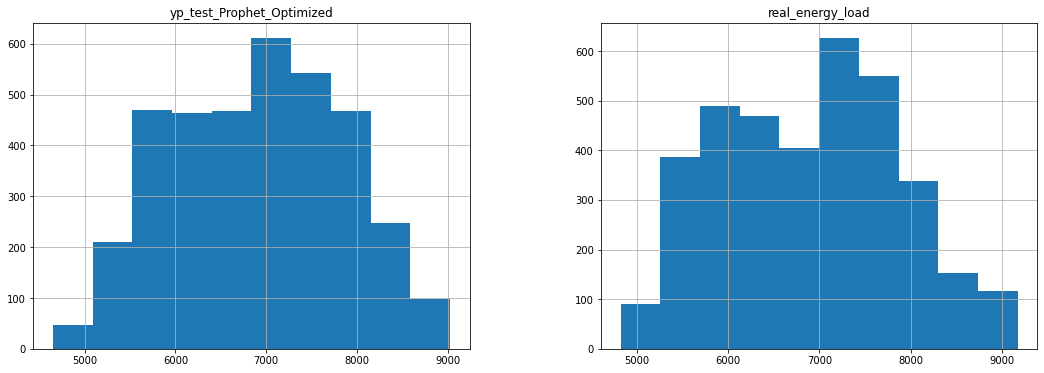

In [41]:
optimized_prophet.hist(figsize = (18, 6))

In [42]:
df = optimized_prophet
fig = px.scatter(df, x=optimized_prophet.index, y= "real_energy_load", hover_data =['yp_test_Prophet_Optimized'], color='yp_test_Prophet_Optimized')
fig.show()